In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np

In [2]:
data_path="D:\\MLforPTC\\05Polymer_data\\"
model_path="D:\\MLforPTC\\03ML_models\\"

In [7]:
df_A=pd.read_pickle(data_path+"datasteA.pkl")
df_B=pd.read_pickle(data_path+"datasteB.pkl")
df= pd.read_pickle(r"D:\MLforPTC\02optimized&graph_descriptors\optimized_descriptor\Optimzed_train.pkl")

In [19]:
AX=df_A["Cross-sectional"]
BX=df_B["Cross-sectional"]
PEX=[15.68736764]
PEY=[4.65861]

In [9]:
X_train=df.drop(df.columns[0:1], axis=1)
X_train

,ABC,ATSC0dv,BCUTdv-1h,CIC0,Cross-sectional,EState_VSA10,ETA_dBeta,Kd_average,Kier2,LogEE_A,MW,MW_ratio,Nd_average,SMR_VSA6,SlogP_VSA3,TopoPSA(NO),Vdw,Xc-4d,mZagreb1,nH
0,16.482236,169.333333,6.030225,4.301211,18.320676,9.589074,-9.25,1.151444,19.326389,4.001003,310.48,1.000000,2.068966,6.606882,19.432465,52.60,344.56,0.000000,8.722222,30
1,11.601438,87.619048,6.021976,3.957193,17.987775,4.794537,-7.75,0.526631,12.456747,3.655737,211.39,0.933630,2.322581,7.047672,4.794537,20.31,247.97,0.000000,6.972222,25
2,10.337054,145.407407,6.028825,2.986266,20.067030,9.589074,-6.25,0.578282,9.242188,3.536301,188.20,0.925452,2.250000,19.820646,24.169328,61.83,182.99,0.000000,7.083333,12
3,14.360915,124.740741,6.029007,3.040952,16.874945,4.794537,3.00,2.406250,7.695266,3.848655,228.21,1.000000,2.000000,0.000000,0.000000,44.76,200.98,0.000000,6.305556,8
4,29.547023,251.030303,6.029349,4.615241,37.130209,9.589074,5.75,0.973460,13.320000,4.562028,476.60,0.504029,2.272727,0.000000,10.829981,52.60,464.68,0.333333,13.736111,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,16.401355,147.319149,6.023187,3.947361,18.115650,9.589074,-4.25,0.792866,13.308642,3.995306,288.43,1.000000,2.363636,6.544756,0.000000,58.20,303.14,0.000000,8.194444,24
1631,15.165481,183.478261,6.030250,3.931562,16.093591,19.802129,-9.75,0.674044,14.583333,3.922965,288.38,0.889035,2.228571,6.606882,19.432465,93.06,295.58,0.000000,9.444444,24
1632,32.262013,303.085714,6.032501,4.454822,18.047446,23.972686,-0.50,1.133234,17.629669,4.647070,540.61,1.000000,2.130435,23.430462,9.473726,119.08,506.65,0.000000,13.944444,28
1633,11.044161,155.866667,6.030468,3.181398,41.749053,9.589074,-6.75,0.665734,8.144044,3.613250,202.23,0.287247,2.347826,19.820646,24.169328,61.83,200.29,0.125000,8.034722,14


In [11]:
scaler.fit(X_train)
X_datasetA = scaler.transform(df_A)
X_datasetB = scaler.transform(df_B)

D:\software\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ATS0dv
Feature names seen at fit time, yet now missing:
- ATSC0dv

  warnings.warn(message, FutureWarning)


In [13]:
#RF Model
RF="RF.model"
rf_model = joblib.load(model_path+RF)
RF_A=rf_model.predict(X_datasetA)
RF_B=rf_model.predict(X_datasetB)

D:\software\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\software\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


C:\Users\huang\AppData\Local\Temp/ipykernel_43780/844042787.py:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(PEX,PEY, color='', marker='*',s=150,edgecolors='k',linewidths=1.5,zorder=3)


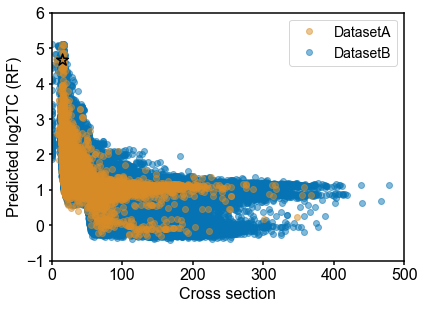

In [26]:
plt.rc('font',family='Arial',weight='normal')
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 16,
}
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 16,
}
plt.figure(figsize=(6,4.4))
#plt.title("Traing dataset with r2=0.955",font1)
#plt.plot(Poly_x,Poly_y,color='#D88C27',marker='o',linestyle='', markerfacecolor='white',alpha=1)
plt.plot(AX,RF_A,color='#D88C27',marker='o',linestyle='',alpha=0.5,zorder=2)
plt.plot(BX,RF_B,color='#0674B4',marker='o',linestyle='',alpha=0.5,zorder=1)
#plt.plot(PEX,PEY,color='k',marker='*',linestyle='',markersize=10,alpha=1,zorder=3)
plt.scatter(PEX,PEY, color='', marker='*',s=150,edgecolors='k',linewidths=1.5,zorder=3)
#plt.scatter(PAX,PAY, color='', marker='^',s=150,edgecolors='k',linewidths=1.5,zorder=3)
#plt.plot(y_test,res_test,color='r',marker='o',linestyle='', markerfacecolor='white',alpha=1)
plt.legend(labels=["DatasetA","DatasetB"],loc="best",fontsize=14)  
title='Cross section'
title1='Predicted log2TC (RF)'
plt.xlabel(title,font1 )
plt.ylabel(title1,font1 )
plt.xlim((0, 500))
plt.ylim((-1, 6))
#plt.plot([-1,9],[-1,9], color='k', linewidth=1.5, linestyle='--')
my_x_ticks = np.arange(0,600,100)
my_y_ticks = np.arange(-1,7,1)
plt.xticks(my_x_ticks,size=16)
plt.yticks(my_y_ticks,size=16)
plt.tick_params(width=1.5)
bwith = 1.5 #边框宽度设置为2
TK = plt.gca()#获取边框
TK.spines['bottom'].set_linewidth(bwith)#图框下边
TK.spines['left'].set_linewidth(bwith)#图框左边
TK.spines['top'].set_linewidth(bwith)#图框上边
TK.spines['right'].set_linewidth(bwith)#图框右边
plt.tight_layout()
# show
plt.show()

In [27]:
#XGBoost Model
Xgb="Xgboost.model"
Xgb_model = joblib.load(model_path+Xgb)
Xgb_A=Xgb_model.predict(X_datasetA)
Xgb_B=Xgb_model.predict(X_datasetB)

C:\Users\huang\AppData\Local\Temp/ipykernel_43780/3970881782.py:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(PEX,PEY, color='', marker='*',s=150,edgecolors='k',linewidths=1.5,zorder=3)


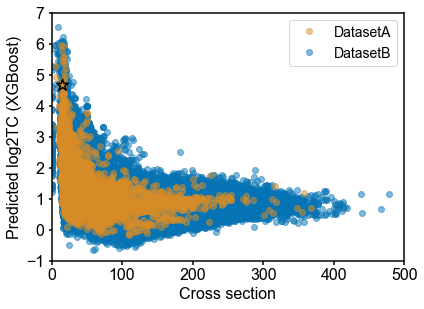

In [39]:
plt.rc('font',family='Arial',weight='normal')
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 16,
}
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 16,
}
plt.figure(figsize=(6,4.4))
#plt.title("Traing dataset with r2=0.955",font1)
#plt.plot(Poly_x,Poly_y,color='#D88C27',marker='o',linestyle='', markerfacecolor='white',alpha=1)
plt.plot(AX,Xgb_A,color='#D88C27',marker='o',linestyle='',alpha=0.5,zorder=2)
plt.plot(BX,Xgb_B,color='#0674B4',marker='o',linestyle='',alpha=0.5,zorder=1)
#plt.plot(PEX,PEY,color='k',marker='*',linestyle='',markersize=10,alpha=1,zorder=3)
plt.scatter(PEX,PEY, color='', marker='*',s=150,edgecolors='k',linewidths=1.5,zorder=3)
#plt.scatter(PAX,PAY, color='', marker='^',s=150,edgecolors='k',linewidths=1.5,zorder=3)
#plt.plot(y_test,res_test,color='r',marker='o',linestyle='', markerfacecolor='white',alpha=1)
plt.legend(labels=["DatasetA","DatasetB"],loc="best",fontsize=14)  
title='Cross section'
title1='Predicted log2TC (XGBoost)'
plt.xlabel(title,font1 )
plt.ylabel(title1,font1 )
plt.xlim((0, 500))
plt.ylim((-1, 7))
#plt.plot([-1,9],[-1,9], color='k', linewidth=1.5, linestyle='--')
my_x_ticks = np.arange(0,600,100)
my_y_ticks = np.arange(-1,8,1)
plt.xticks(my_x_ticks,size=16)
plt.yticks(my_y_ticks,size=16)
plt.tick_params(width=1.5)
bwith = 1.5 #边框宽度设置为2
TK = plt.gca()#获取边框
TK.spines['bottom'].set_linewidth(bwith)#图框下边
TK.spines['left'].set_linewidth(bwith)#图框左边
TK.spines['top'].set_linewidth(bwith)#图框上边
TK.spines['right'].set_linewidth(bwith)#图框右边
plt.tight_layout()
# show
plt.show()

In [36]:
#MLP Model
MLP="MLP.model"
MLP_model = joblib.load(model_path+MLP)
MLP_A=MLP_model.predict(X_datasetA)
MLP_B=MLP_model.predict(X_datasetB)

D:\software\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


C:\Users\huang\AppData\Local\Temp/ipykernel_43780/2041170173.py:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(PEX,PEY, color='', marker='*',s=150,edgecolors='k',linewidths=1.5,zorder=3)


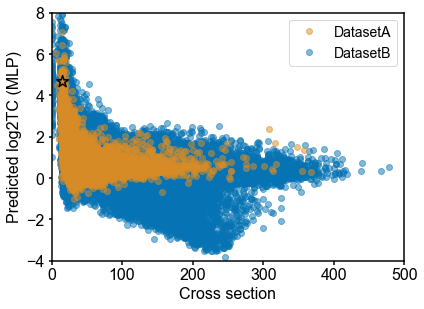

In [38]:
plt.rc('font',family='Arial',weight='normal')
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 16,
}
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 16,
}
plt.figure(figsize=(6,4.4))
#plt.title("Traing dataset with r2=0.955",font1)
#plt.plot(Poly_x,Poly_y,color='#D88C27',marker='o',linestyle='', markerfacecolor='white',alpha=1)
plt.plot(AX,MLP_A,color='#D88C27',marker='o',linestyle='',alpha=0.5,zorder=2)
plt.plot(BX,MLP_B,color='#0674B4',marker='o',linestyle='',alpha=0.5,zorder=1)
#plt.plot(PEX,PEY,color='k',marker='*',linestyle='',markersize=10,alpha=1,zorder=3)
plt.scatter(PEX,PEY, color='', marker='*',s=150,edgecolors='k',linewidths=1.5,zorder=3)
#plt.scatter(PAX,PAY, color='', marker='^',s=150,edgecolors='k',linewidths=1.5,zorder=3)
#plt.plot(y_test,res_test,color='r',marker='o',linestyle='', markerfacecolor='white',alpha=1)
plt.legend(labels=["DatasetA","DatasetB"],loc="best",fontsize=14)  
title='Cross section'
title1='Predicted log2TC (MLP)'
plt.xlabel(title,font1 )
plt.ylabel(title1,font1 )
plt.xlim((0, 500))
plt.ylim((-1, 7))
#plt.plot([-1,9],[-1,9], color='k', linewidth=1.5, linestyle='--')
my_x_ticks = np.arange(0,600,100)
my_y_ticks = np.arange(-4,9,2)
plt.xticks(my_x_ticks,size=16)
plt.yticks(my_y_ticks,size=16)
plt.tick_params(width=1.5)
bwith = 1.5 #边框宽度设置为2
TK = plt.gca()#获取边框
TK.spines['bottom'].set_linewidth(bwith)#图框下边
TK.spines['left'].set_linewidth(bwith)#图框左边
TK.spines['top'].set_linewidth(bwith)#图框上边
TK.spines['right'].set_linewidth(bwith)#图框右边
plt.tight_layout()
# show
plt.show()